### I. Uploading the dataset(s)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import missingno
from scipy import stats
# import researchpy as rp


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
df_raw  = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_raw = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

df_raw.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.options.display.max_rows = 81
df_raw.isnull().sum()


# sort a dataframe based on column names
df_raw = df_raw.sort_index(axis=1)
df_raw.describe()


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,3.409589,2.866438,443.639726,46.549315,0.425342,0.057534,567.240411,21.954110,...,6.099315,2.758904,180921.195890,15.060959,6.517808,1057.429452,94.244521,1971.267808,1984.865753,2007.815753
std,386.587738,436.528436,29.317331,0.815778,456.098091,161.319273,0.518911,0.238753,441.866955,61.119149,...,1.382997,40.177307,79442.502883,55.757415,1.625393,438.705324,125.338794,30.202904,20.645407,1.328095
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,882.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,795.750000,0.000000,1954.000000,1967.000000,2007.000000
50%,1087.000000,0.000000,0.000000,3.000000,383.500000,0.000000,0.000000,0.000000,477.500000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,991.500000,0.000000,1973.000000,1994.000000,2008.000000
75%,1391.250000,728.000000,0.000000,3.000000,712.250000,0.000000,1.000000,0.000000,808.000000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1298.250000,168.000000,2000.000000,2004.000000,2009.000000
max,4692.000000,2065.000000,508.000000,8.000000,5644.000000,1474.000000,3.000000,2.000000,2336.000000,552.000000,...,10.000000,738.000000,755000.000000,480.000000,14.000000,6110.000000,857.000000,2010.000000,2010.000000,2010.000000


## **II. Cleaning the Dataset**
#### After getting to know our variables and their characteristics, it is important to clean your data. It means to find any false data input, any Nan, empty or undefined input. 

1.  ### Missing Values in train datasets

In [4]:
df_raw.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            1369
BedroomAbvGr        0
BldgType            0
BsmtCond           37
BsmtExposure       38
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFinType1       37
BsmtFinType2       38
BsmtFullBath        0
BsmtHalfBath        0
BsmtQual           37
BsmtUnfSF           0
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
Fence            1179
FireplaceQu       690
Fireplaces          0
Foundation          0
FullBath            0
Functional          0
GarageArea          0
GarageCars          0
GarageCond         81
GarageFinish       81
GarageQual         81
GarageType         81
GarageYrBlt        81
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
HouseStyle          0
Id                  0
KitchenAbvGr        0
KitchenQua

graphing the missing values will also give an overal intuition of them in each category. 
As it can be seen, some categories are severly missing data.
it is important to make sure if there is any meaning behind these values or they are just simply missing data. looking at /data description/ we see there is a meaning behind most of these Nan values. 
so next it would be the best to place an input for the miisng values:

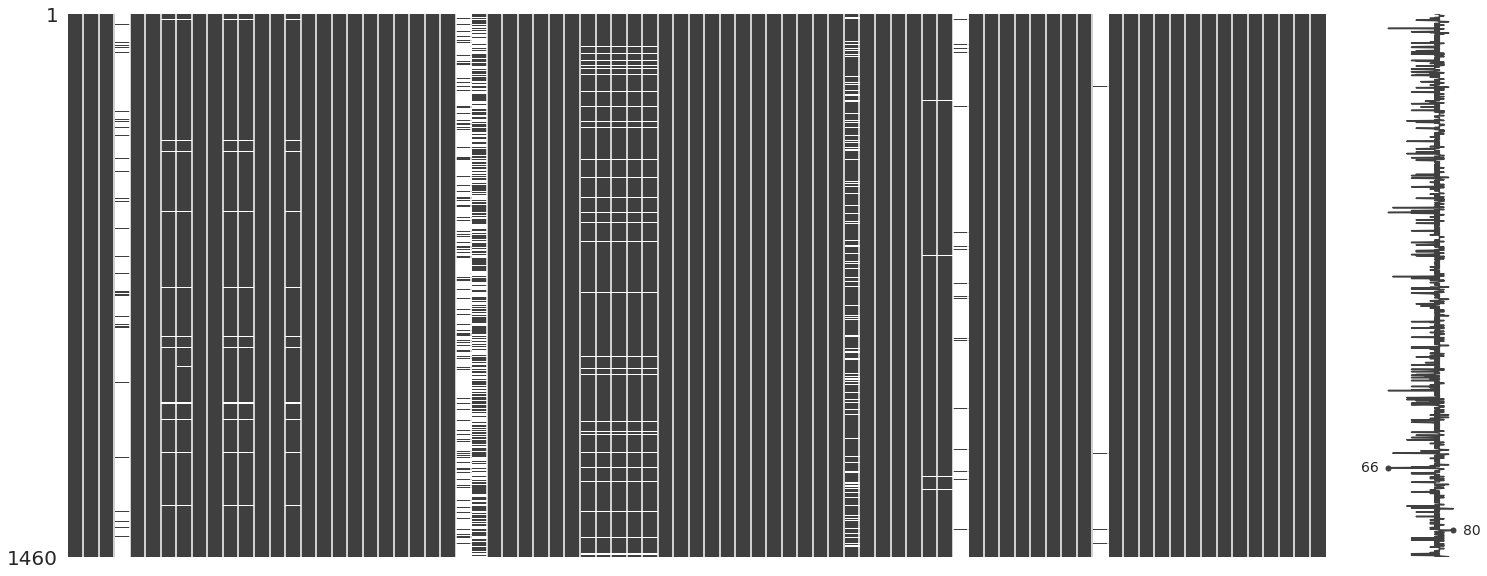

In [5]:
missingno.matrix(df_raw)

In [6]:
df = df_raw.copy()
# df_clean = df_clean.drop(['PoolQC', 'Fence'], axis = 1)

df["Alley"].fillna("No Alley", inplace = True)
df["PoolQC"].fillna("No Pool", inplace = True) 
df["MiscFeature"].fillna("Nothing", inplace = True) 
df["LotFrontage"].fillna("0", inplace = True) 
df["Fence"].fillna("No Fence", inplace = True) 
df["MasVnrType"].fillna("No MasVnr", inplace = True) 
df["MasVnrArea"].fillna("0", inplace = True) 
df["BsmtExposure"].fillna("No Basement", inplace = True) 
df["BsmtQual"].fillna("No Basement", inplace = True) 
df["BsmtCond"].fillna("No Basement", inplace = True) 
df["BsmtFinType1"].fillna("No Basement", inplace = True) 
df["BsmtFinType2"].fillna("No Basement", inplace = True) 
df["FireplaceQu"].fillna("No Fireplace", inplace = True) 
df["GarageType"].fillna("No Garage", inplace = True) 
df["GarageYrBlt"].fillna("0", inplace = True) 
df["GarageQual"].fillna("No Garage", inplace = True) 
df["GarageCond"].fillna("No Garage", inplace = True) 
df["GarageFinish"].fillna("No Garage", inplace = True) 

df["Electrical"].fillna("Mix", inplace = True) 

df.isnull().sum()


1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
GarageYrBlt      0
GrLivArea        0
HalfBath         0
Heating          0
HeatingQC        0
HouseStyle       0
Id               0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LandSlope        0
LotArea          0
LotConfig        0
LotFrontage      0
LotShape         0
LowQualFinSF

2. ### handleing missing values of test dataset

Almost all of the Nan values from train set had a meaning behind them. so we expet to see the same pattern with test set. 
lets adjust the inputs values accordingly:

In [7]:
test_raw.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
test =test_raw.copy()

test["Alley"].fillna("No Alley", inplace = True)
test["PoolQC"].fillna("No Pool", inplace = True) 
test["MiscFeature"].fillna("Nothing", inplace = True) 
test["LotFrontage"].fillna("0", inplace = True) 
test["Fence"].fillna("No Fence", inplace = True) 
test["MasVnrType"].fillna("No MasVnr", inplace = True) 
test["MasVnrArea"].fillna("0", inplace = True) 
test["BsmtExposure"].fillna("No Basement", inplace = True) 
test["BsmtQual"].fillna("No Basement", inplace = True) 
test["BsmtCond"].fillna("No Basement", inplace = True) 
test["BsmtFinType1"].fillna("No Basement", inplace = True) 
test["BsmtFinType2"].fillna("No Basement", inplace = True) 
test["FireplaceQu"].fillna("No Fireplace", inplace = True) 
test["GarageType"].fillna("No Garage", inplace = True) 
test["GarageYrBlt"].fillna("0", inplace = True) 
test["GarageQual"].fillna("No Garage", inplace = True) 
test["GarageCond"].fillna("No Garage", inplace = True) 
test["GarageFinish"].fillna("No Garage", inplace = True) 

test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       1
BsmtFinType2     0
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

After handling the common missing values of test dataset, we still find Nan values in other categories. 
after making sure there is no minning behind these Nan input based on our data description. we shall impute missing values. 



### KNN Imputation
we use  non parametric *K Nearest Neighbers* {KNN} Imputation to handle categirical missing values of each variable.
 the problem here is categorical input can not be handled by KNN so we will convert our categorical inputs to numerical. 
 for this manner we do as following:
 by looking at our data types, our categotical inputs are labled as 'Obejct', we will convert them to categorical and then from categorical to numeric, int type. 

In [9]:
#All the vcategoricak columns
for col in ['MSZoning','Utilities','SaleType','KitchenQual',
            'Alley', 'LotFrontage', 'Street', 'LandContour', 
             'LotConfig',  'LandSlope','Neighborhood',
            'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
            'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
            'MasVnrType', 'MasVnrArea','ExterQual', 'ExterCond',
            'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
            'BsmtFinType1', 'BsmtFinType2', 'LotShape', 'GarageQual',
            'LotShape','GarageType','Functional','GarageFinish',
            'PoolQC', 'Fence','MiscFeature','SaleCondition',
            'Heating','HeatingQC','CentralAir','Electrical','FireplaceQu',
            'GarageYrBlt','GarageCond','PavedDrive']:
    test[col] = test[col].astype('category')
    #convertu=ing nume
    test[col] = test[col].cat.codes

    
test = test.sort_index(axis=1)

In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
test_filled = imputer.fit_transform(test)


since I did change the representation of test data's inputs, I'll chnage the train datasets accordingly as well.

In [11]:
for col in ['Alley', 'MSZoning', 'LotFrontage', 'Street', 'LandContour', 
            'Utilities', 'LotConfig',  'LandSlope','Neighborhood',
            'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
            'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
            'MasVnrType', 'MasVnrArea','ExterQual', 'ExterCond',
            'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
            'BsmtFinType1', 'BsmtFinType2', 'LotShape', 'GarageQual',
            'LotShape','GarageType','KitchenQual','Functional','GarageFinish',
            'PoolQC', 'Fence','MiscFeature','SaleType','SaleCondition',
            'Heating','HeatingQC','CentralAir','Electrical','FireplaceQu',
            'GarageYrBlt','GarageCond','PavedDrive']:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

## III. Data Visualization 


Before getting into details, it is the best to get an overal intuition of our dataset and their reltionships.  
in this dataset, our focus is housing sale price. 
Getting the correlation bettwen all 80 categories will give an overall insite of our variables. 

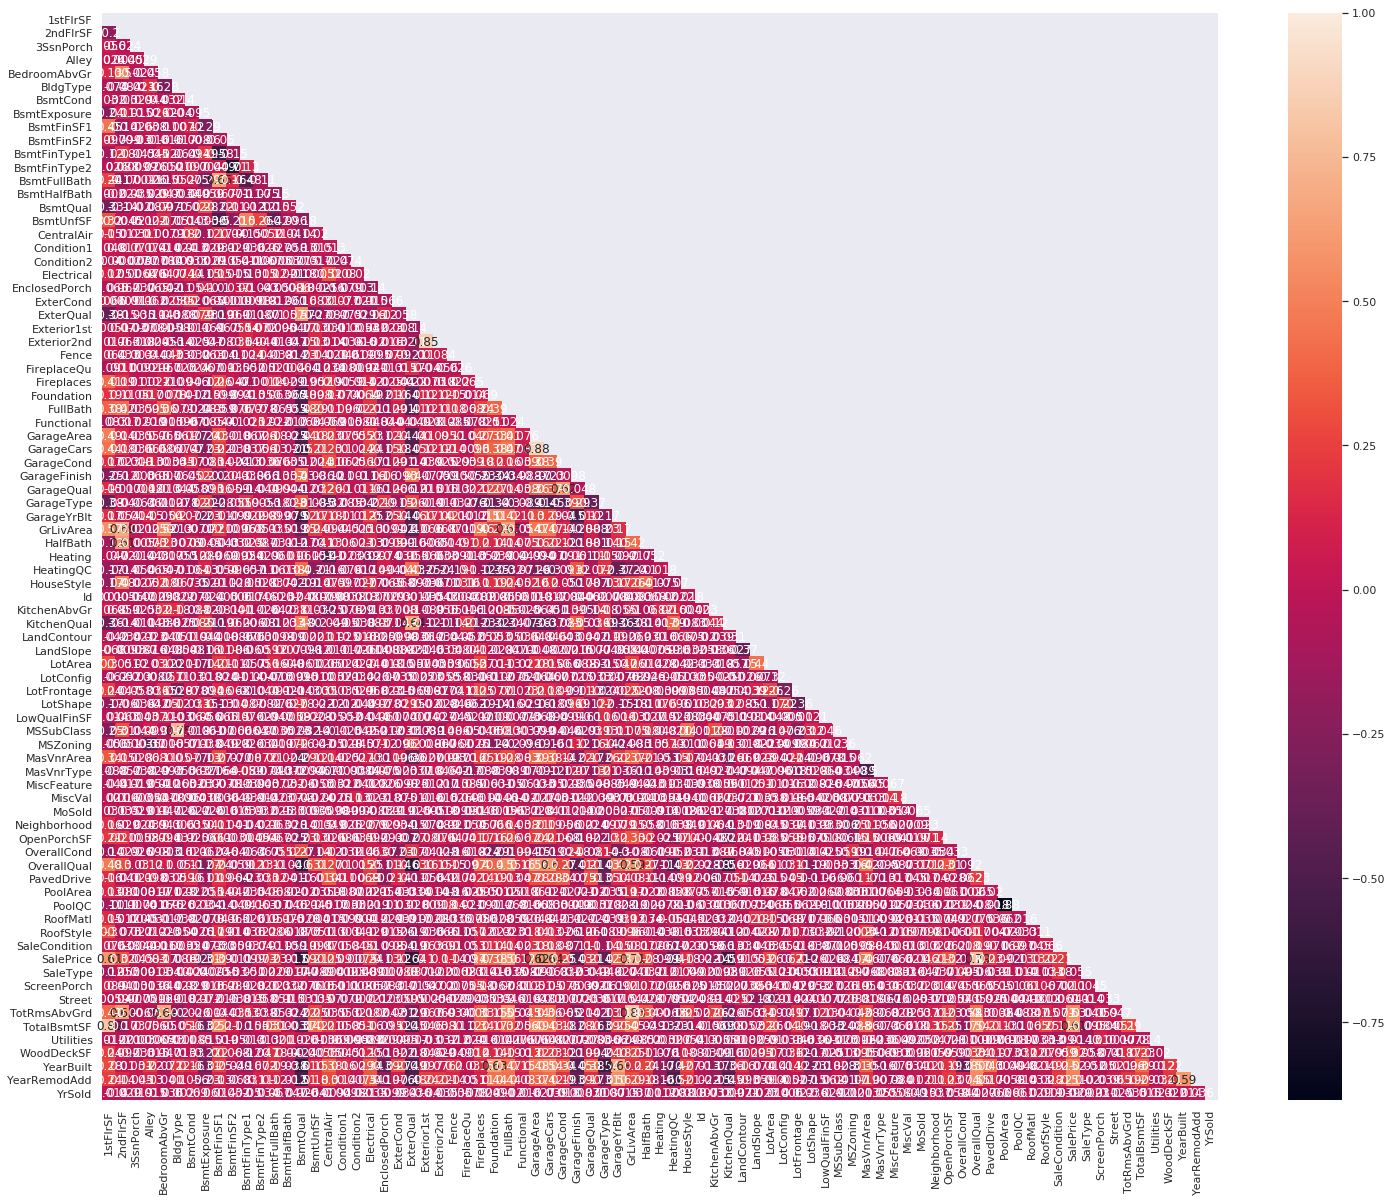

In [12]:
plt.subplots(figsize=(25,20))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

sns.heatmap(df.corr(), annot = True, mask=mask)

Text(0.5, 1.0, 'Housing price distribution')

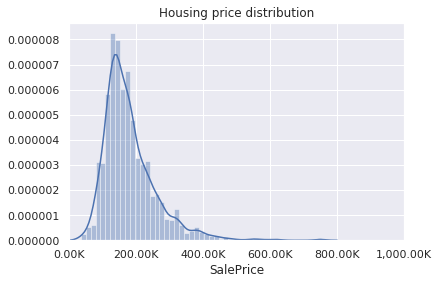

In [13]:
g =sns.distplot(df['SalePrice'], label ='Sale Price')
g.set(xlim = (0,1000000));
xlabels = ['{:,.2f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)
plt.title('Housing price distribution')

Q-Q plot to see the normality of the data of sale prices

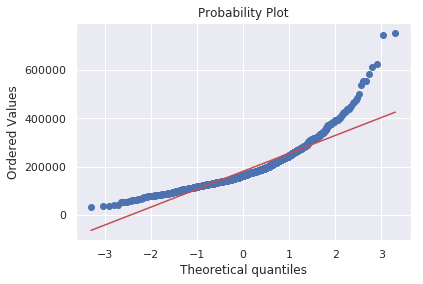

In [14]:
res = stats.probplot(df['SalePrice'], plot=plt)

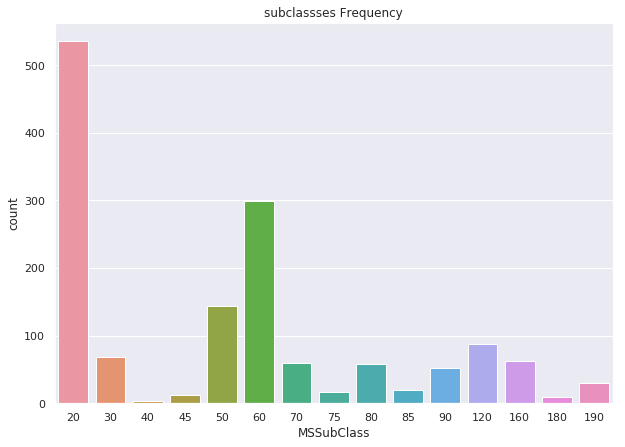

In [15]:
plt.subplots(figsize=(10,7))
plt.title('subclassses Frequency')
sns.countplot(df['MSSubClass'])

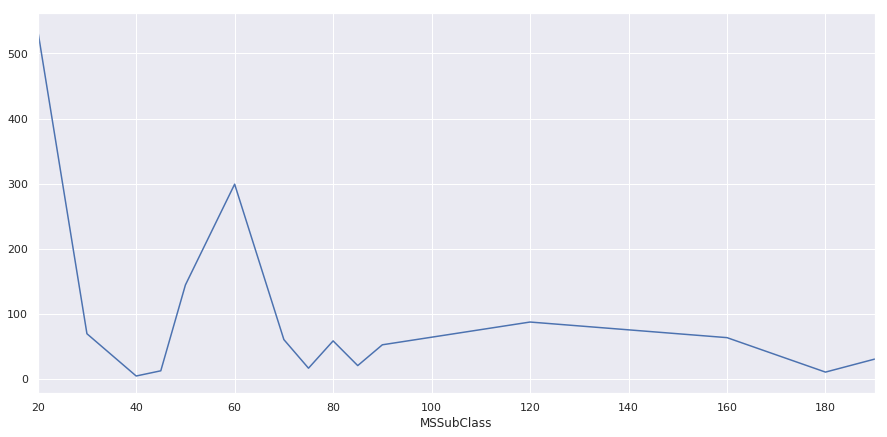

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['MSSubClass']).count()['SalePrice'].plot(ax=ax)

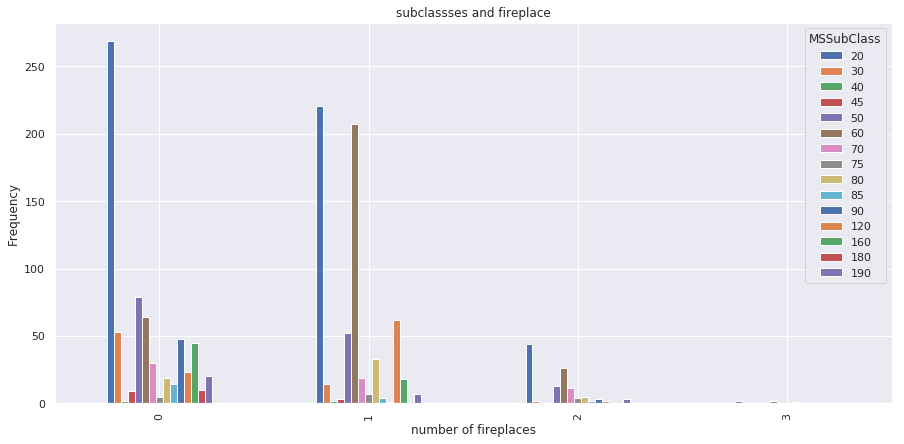

In [17]:
pd.crosstab(df_raw.Fireplaces,df_raw.MSSubClass).plot(kind="bar",figsize=(15,7))
plt.title('subclassses and fireplace')

plt.xlabel('number of fireplaces')
plt.ylabel('Frequency')
# plt.savefig('heartDiseaseAndAges.png')
plt.show()


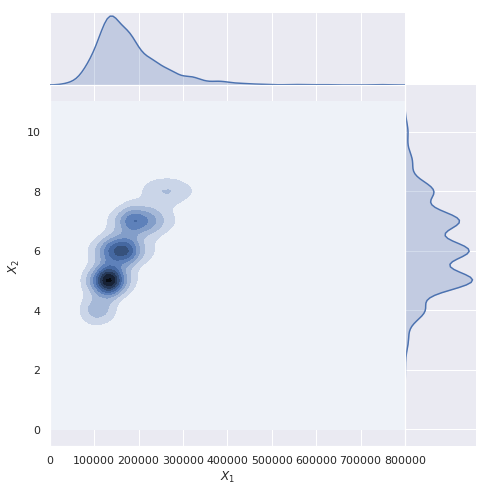

In [18]:
x1 = pd.Series(df['SalePrice'], name="$X_1$")
x2 = pd.Series(df['OverallQual'], name="$X_2$")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0, xlim = (0,800000) )


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


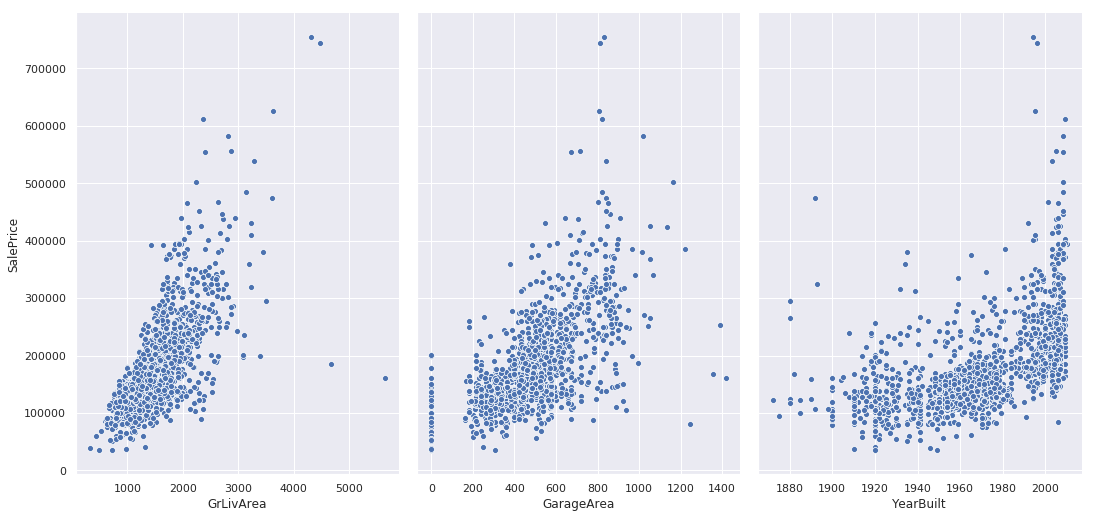

In [19]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['GrLivArea','GarageArea',  'YearBuilt'],
             y_vars='SalePrice', size=7, aspect=0.7) # kind='reg'


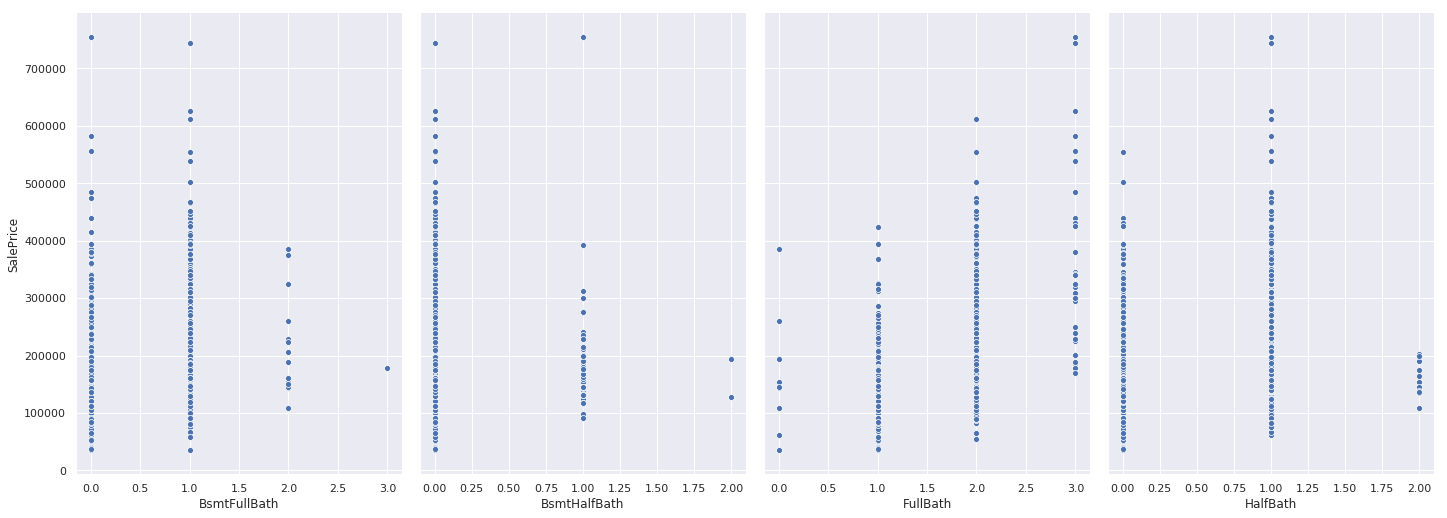

In [20]:
sns.pairplot(df, x_vars=['BsmtFullBath','BsmtHalfBath' ,'FullBath', 'HalfBath'],
             y_vars='SalePrice', size=7, aspect=0.7) # kind='reg'

## IV. Implementing ML algorithms

In [21]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, RandomForestClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split


In [22]:
X = df.drop('SalePrice', axis= 1) #data
y = df.SalePrice #label

X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.70 , random_state =  90)



* Random Forest Classifier

In [23]:
model_rf = RandomForestClassifier(random_state=30, n_estimators= 10);
model_rf.fit(X_train, y_train);

In [24]:
predict =model_rf.predict(X_test)

from sklearn import metrics
print ('Accuracy:', metrics.accuracy_score(y_test,predict))
print(model_rf.feature_importances_)

Accuracy: 0.002277904328018223
[0.03590799 0.01795908 0.00358762 0.00372973 0.0140578  0.007109
 0.00752417 0.01183251 0.02546441 0.00869887 0.01815052 0.00766822
 0.00664179 0.00310226 0.00828381 0.03383792 0.00226014 0.00698557
 0.00142424 0.00385811 0.0097248  0.00640839 0.00638043 0.01641571
 0.0173532  0.00889725 0.01319989 0.00955195 0.01015441 0.0062021
 0.00411622 0.03256741 0.01048562 0.00266735 0.00996741 0.00390222
 0.00916112 0.03159457 0.03378818 0.00748652 0.00246405 0.01064193
 0.0131477  0.03561046 0.00239873 0.00844931 0.0071917  0.0022733
 0.03552659 0.01074167 0.02921654 0.0065818  0.00159598 0.01373502
 0.00690325 0.02404013 0.0126241  0.0025179  0.00357514 0.02858899
 0.02402881 0.02025586 0.01319596 0.01792993 0.00298901 0.00028614
 0.00108157 0.00077064 0.00723278 0.00840609 0.00869025 0.00831685
 0.00058963 0.01777793 0.03499805 0.         0.02255697 0.0299954
 0.02523868 0.01972663]


* Simple Linear Regression 

In [25]:
# Fitting Simple Linear Regression to the Training set
linreg = LinearRegression();
linreg.fit(X_train, y_train);

In [26]:
#print y_intercept
print('Y-intercept: ', linreg.intercept_)

coeff_df = pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])  
print('Model coef: ', coeff_df);




Y-intercept:  888084.4561231892
Model coef:                  Coefficient
1stFlrSF       2.601884e+01
2ndFlrSF       2.521323e+01
3SsnPorch      8.108844e+00
Alley          3.783639e+03
BedroomAbvGr  -4.857198e+03
BldgType      -2.549382e+03
BsmtCond       3.999912e+02
BsmtExposure  -4.596933e+03
BsmtFinSF1    -3.650069e-02
BsmtFinSF2     3.857937e+00
BsmtFinType1  -1.011238e+03
BsmtFinType2   5.084556e+02
BsmtFullBath   7.395763e+03
BsmtHalfBath   2.049724e+03
BsmtQual      -3.645542e+03
BsmtUnfSF     -2.706106e+00
CentralAir     6.707029e+03
Condition1    -1.319118e+02
Condition2    -1.608707e+02
Electrical    -3.820528e+02
EnclosedPorch -1.611216e+01
ExterCond      2.397942e+03
ExterQual     -9.496826e+03
Exterior1st   -9.083196e+02
Exterior2nd    3.266782e+02
Fence         -2.403624e+02
FireplaceQu   -1.446585e+03
Fireplaces     4.671048e+03
Foundation    -9.922030e+02
FullBath       3.400262e+03
Functional     3.654608e+03
GarageArea    -2.031067e+01
GarageCars     1.654729e+04
Gar

In [27]:

y_pred =linreg.predict(X_test)

#MAE
print('MAE: ',(metrics.mean_absolute_error(y_test,y_pred)))

#MSE
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))

# RMSE
print('RSME: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  20808.351533202716
MSE:  1200075386.4132323
RSME:  34642.1042434381


In [28]:
# print the R-squared value for the model
print( 'Accuracy:', linreg.score(X, y))

Accuracy: 0.8443494919325836


### *visualizing the model*

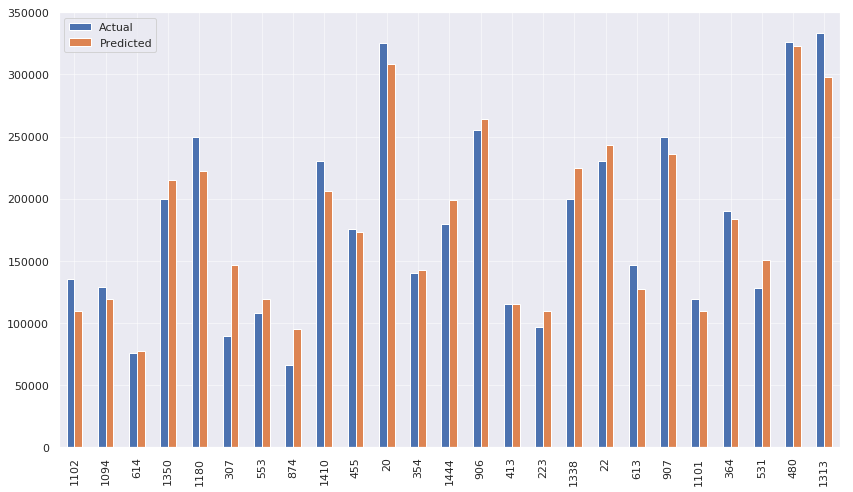

In [29]:

df_training = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 =df_training.head(25)
df1

df1.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()


* #### Randomm Forest Regressor 


In [30]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train, y_train)

print(rfreg.feature_importances_)

y_pred =rfreg.predict(X_test)


[1.60504705e-02 3.05691513e-02 6.28762927e-05 2.68202288e-04
 1.79633999e-03 4.45594862e-04 4.06552839e-04 2.32455365e-03
 2.08403440e-02 6.88521159e-04 1.08197657e-03 2.77644162e-04
 7.81678078e-04 1.76643309e-04 2.60386807e-03 5.57323365e-03
 7.96065138e-03 5.48350957e-04 8.79780486e-05 9.28166775e-05
 3.29614974e-04 4.85452644e-04 1.40511611e-03 1.35949404e-03
 1.33382340e-03 2.57085113e-04 8.30227079e-04 2.15103448e-03
 5.91311032e-04 1.58187197e-02 5.05580832e-04 2.07156400e-02
 1.69156624e-02 1.35580874e-03 1.60953155e-03 6.41046670e-04
 6.04966222e-03 4.81785381e-03 1.23666420e-01 7.28108409e-04
 3.05904833e-05 8.03899934e-04 4.77451091e-04 4.48028826e-03
 3.49038665e-04 4.44889199e-03 1.03344638e-03 8.49248290e-04
 1.67281155e-02 1.44755001e-03 4.60440009e-03 4.79810648e-03
 5.64114746e-05 1.82071340e-03 9.31873238e-04 6.81018124e-03
 1.26980569e-03 2.56360321e-05 2.80404143e-05 2.70620155e-03
 5.81655455e-03 4.41412119e-03 2.90249409e-03 5.69692720e-01
 2.52198757e-04 1.530082

In [31]:
print( 'Accuracy:', rfreg.score(X, y))

#MAE
print('MAE: ',int((metrics.mean_absolute_error(y_test,y_pred))))

#MSE
print('MSE: ', int(metrics.mean_squared_error(y_test,y_pred)))

# RMSE
print('RSME: ',int( np.sqrt(metrics.mean_squared_error(y_test,y_pred))))


Accuracy: 0.9422394761840981
MAE:  18351
MSE:  910211286
RSME:  30169


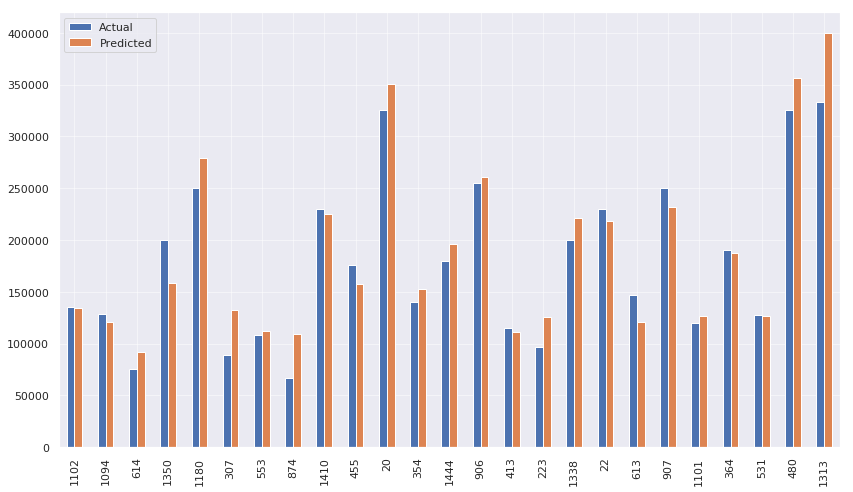

In [32]:

df_training2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2=df_training2.head(25)
df2


df2.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()





### Finilizing

* ### Evaluating the Test set


In [33]:
test_pred =rfreg.predict(test_filled)

* ### saving the test prediction 

In [34]:
submission = pd.DataFrame({
        "Id": test['Id'],
        "SalePrice": test_pred
    })
submission

submission.to_csv('..\\house_price\\submission.csv', index=False)